In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
read_file=pd.read_csv("Housing.csv")
read_file.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
read_file.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
#check there are any missing or dublicate values
read_file.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

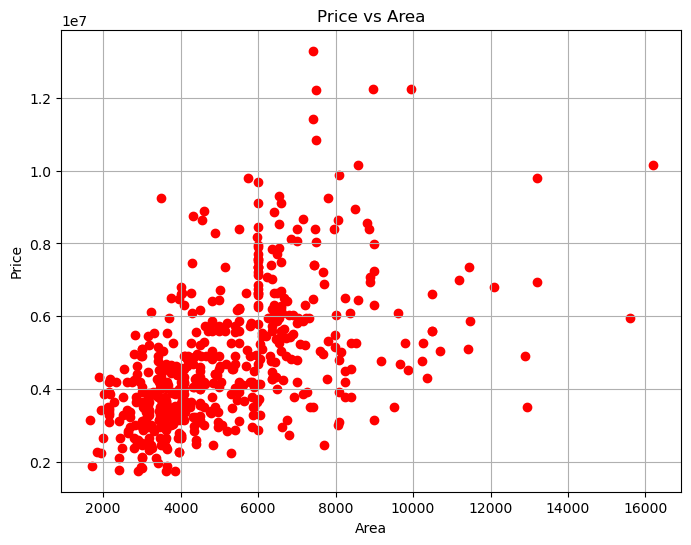

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(read_file['area'], read_file['price'], color='red')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [7]:
#now feature analysis
x=read_file.drop('price',axis=1)
y=read_file['price']

In [8]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
# first convert the numbers into the numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catagorical_features=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,7420.0,4.0,2.0,3.0,2.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,8960.0,4.0,4.0,4.0,3.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,9960.0,3.0,2.0,2.0,2.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,7500.0,4.0,2.0,2.0,3.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,7420.0,4.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3000.0,2.0,1.0,1.0,2.0
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2400.0,3.0,1.0,1.0,0.0
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3620.0,2.0,1.0,1.0,0.0
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2910.0,3.0,1.0,1.0,0.0


In [10]:
#make some dummies
dummies=pd.get_dummies(read_file[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]])
dummies

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,False,True,True,False,True,False,True,False,False,True,False,True,True,False,False
1,False,True,True,False,True,False,True,False,False,True,True,False,True,False,False
2,False,True,True,False,False,True,True,False,True,False,False,True,False,True,False
3,False,True,True,False,False,True,True,False,False,True,False,True,True,False,False
4,False,True,False,True,False,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,True,True,False,False,True,True,False,True,False,True,False,False,False,True
541,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False
542,False,True,True,False,True,False,True,False,True,False,True,False,False,False,True
543,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,train_size=0.3)

In [17]:
#now train the model
model=LinearRegression()


In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.score(x_test,y_test)

0.6300716132215547

In [20]:
#make the pickle file of it
import pickle
with open('my_data.pkl', 'wb') as file:
    pickle.dump(model,file)